# Project - ECEN758 - Data Mining

This will count towards the project submission for ECEN758, Fall 2025. The course covers an introduction to concepts, methods, and practices in statistical data mining. It also
provides a broad overview of topics that are related to supervised and unsupervised learning.

## **Introduction and Dataset Preview**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

print("## 1. Data Preparation")

# Load Fashion MNIST data (Step 1)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

LABELS_MAP = ['T-shirt/top','Trouser','Pullover','Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

print(LABELS_MAP)

print(f"Original Train: {train_images.shape}")
print(f"Original Test: {test_images.shape}")

# Train/Val Split (80% Train, 20% Validation of the 60,000 samples)
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print(f"Split Train: {X_train.shape}")
print(f"Split Validation: {X_val.shape}")
print(f"Test: {test_images.shape}")

# Normalize (0-1)
X_train_norm = X_train / 255.0
X_val_norm   = X_val   / 255.0
X_test_norm  = test_images / 255.0

# Reshape (784 for ML/PCA, 28x28x1 for CNN)
# For CNN
X_train_cnn = X_train_norm.reshape(-1, 28, 28, 1)
X_val_cnn   = X_val_norm.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test_norm.reshape(-1, 28, 28, 1)

# For ML (Logistic Regression, KNN, SVM, RF) and PCA/t-SNE
X_train_flat = X_train_norm.reshape(-1, 784)
X_val_flat   = X_val_norm.reshape(-1, 784)
X_test_flat  = X_test_norm.reshape(-1, 784)

print(f"ML/PCA Shape: {X_train_flat.shape}")
print(f"CNN Shape: {X_train_cnn.shape}")

## 1. Data Preparation
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']
Original Train: (60000, 28, 28)
Original Test: (10000, 28, 28)
Split Train: (48000, 28, 28)
Split Validation: (12000, 28, 28)
Test: (10000, 28, 28)
ML/PCA Shape: (48000, 784)
CNN Shape: (48000, 28, 28, 1)


In [ ]:
np.unique(train_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

###Structure

Total Images: The dataset contains a total of 70,000 images.


Image Format: Each image is a 28x28 pixel grayscale image. Since the images are grayscale, each pixel has a single intensity value between 0 (black) and 255 (white).

This gives each image a total of $28 \times 28 = 784$ features (pixels). There are 10 class labels. Each class has 6000 samples in the Training set and 1000 in the Testing set.



###Data Split



Splits: The data is split into a training set and a test set.

Training Set: 60,000 images.

Test Set: 10,000 images.

The Train Set is further split into Validation and Train split for efficient model testing.


###Normalization and Transformation

Algorithms like Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Random Forest are inherently designed to operate on feature vectors, where each row is a data point and each column is an independent feature. These models cannot directly process a 2D matrix structure like an image.

Hence, the need to modify the - 28*28 into 784.



Convolutional layers (Conv2D) expect a 4D input tensor, typically structured as: (BatchSize, Height, Width and Channels). Hence the need for another dimension.

The dataset also does not have any NULL values.

Normalization has been performed to scale the data down (0-1).
The transformation performed further would help avoid data leakage.

## **EDA (Exploratory Data Analysis)**

Let us perform some EDA on the dataset. The transformation would help avoid data leakage.


2. Exploratory Data Analysis (EDA)


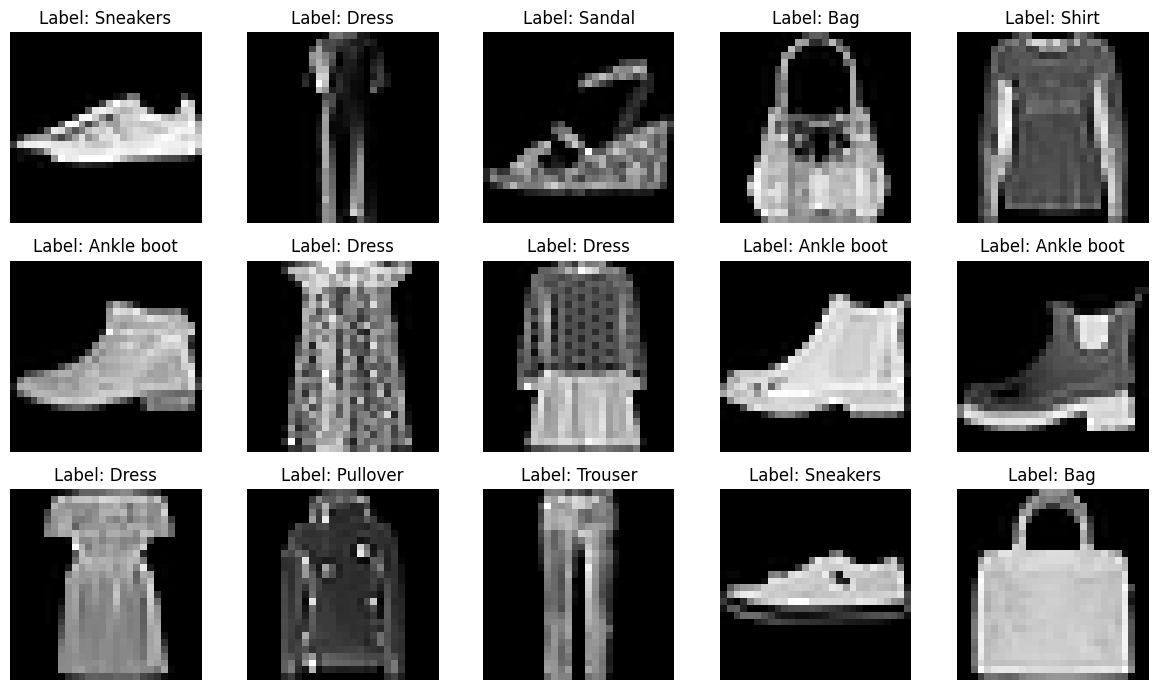

In [ ]:
print("\n2. Exploratory Data Analysis (EDA)")

# Sample images (Step 2 - Sample images)
plt.figure(figsize=(12, 7))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {LABELS_MAP[y_train[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show() #

Running PCA (2 Components) on 2000 samples...


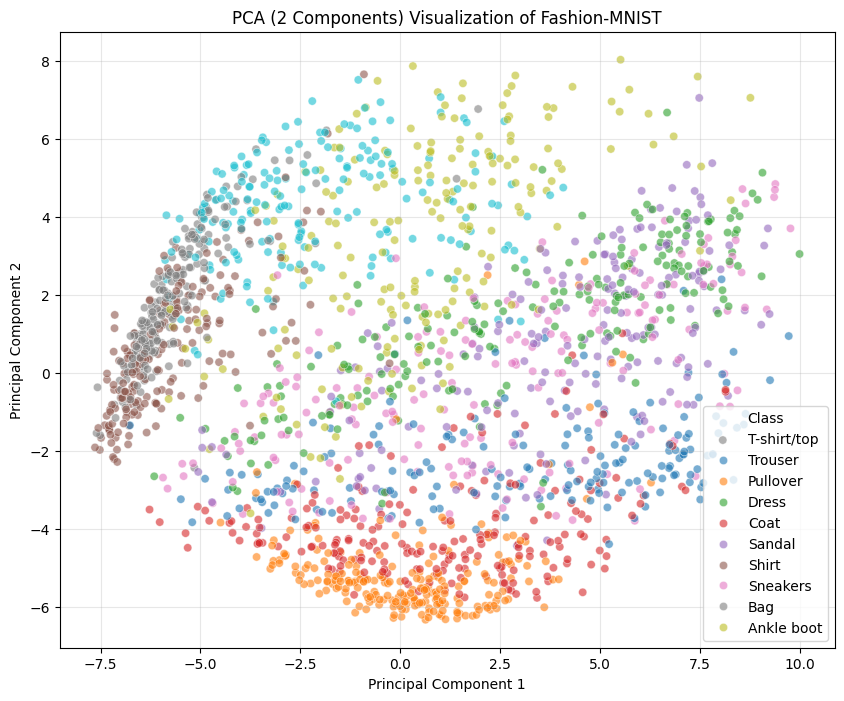


Running t-SNE (2 Components) on 1000 samples (This may take a minute)...


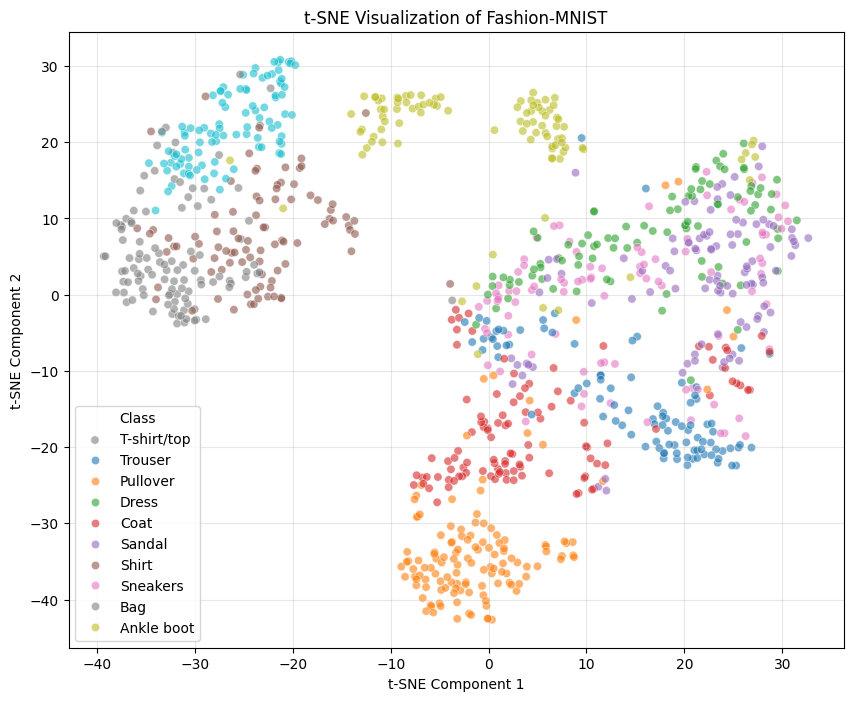


PCA and t-SNE visualizations complete.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca_samples = X_train_flat[:2000]
y_pca_samples = y_train[:2000]

print("Running PCA (2 Components) on 2000 samples...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_samples)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=y_pca_samples,
    palette=sns.color_palette("tab10", 10),
    legend="full",
    alpha=0.6
)
plt.title("PCA (2 Components) Visualization of Fashion-MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(LABELS_MAP, title='Class')
plt.grid(True, alpha=0.3)
plt.show() #


#t-SNE
tsne_samples = X_train_flat[:1000]
y_tsne_samples = y_train[:1000]

print("\nRunning t-SNE (2 Components) on 1000 samples (This may take a minute)...")
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=42, n_jobs=-1)
tsne_result = tsne.fit_transform(tsne_samples)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=y_tsne_samples,
    palette=sns.color_palette("tab10", 10),
    legend="full",
    alpha=0.6
)
plt.title("t-SNE Visualization of Fashion-MNIST")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(LABELS_MAP, title='Class')
plt.grid(True, alpha=0.3)
plt.show() #

print("\nPCA and t-SNE visualizations complete.")

###Inference

The PCA plot shows that classes like Trouser, Sandal, Sneaker, Bag, and Ankle boot are reasonably well-separated from the main cluster of upper-body garments. However, the upper-body garments—T-shirt/top, Pullover, Coat, and Shirt—are heavily overlapped. This confirms that linear separation using the top two principal components is difficult for these visually similar classes.

The t-SNE plot, which captures non-linear local relationships, generally shows much tighter and more distinct clusters. This is typical for t-SNE and suggests that while the image data is high-dimensional, most classes form tight, separable manifolds. The footwear and trousers form clean, isolated groups, while the upper-body garments still show some clustering with each other (e.g., Shirt often being near Pullover or T-shirt/top), highlighting the inherent difficulty of these specific distinctions.

This EDA confirms that the hard classes will be Shirt, T-shirt/top, and Coat, while Trouser, Bag, and Ankle Boot will be easy.

##**Model Selection and Evaluation**

Let us now use classical Machine Learning models to evaluate and find the best model for classifying the test labels with the best accuracy.

###Logistic Regression without PCA

In [ ]:
# ----------------------------------------------------------------------
# Classical Machine Learning - 1: Logistic Regression (NO PCA)
# Includes Validation Set Metrics
# ----------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Use the pre-prepared flattened and normalized data
# We'll use X_train_flat, X_val_flat, X_test_flat, y_train, y_val, test_labels
X_train_raw = X_train_flat
X_val_raw   = X_val_flat    # Validation data for evaluation
X_test_raw  = X_test_flat

y_train_raw = y_train
y_val_raw   = y_val         # Validation labels
y_test_raw  = test_labels

# Define class names
LABELS_MAP = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]

print("=========================================================")
print(" LOGISTIC REGRESSION (NO PCA) - C Sweep + VALIDATION")
print("=========================================================")

# Hyperparameter search space
lr_C_vals = [0.1, 1, 10]

for C in lr_C_vals:
    print(f"\n--- Running Logistic Regression (C={C}) ---")

    # 1. Train the model
    model = LogisticRegression(C=C, solver="lbfgs", max_iter=1000, random_state=42)
    model.fit(X_train_raw, y_train_raw)

    # 2. Predict on Validation Set
    val_preds = model.predict(X_val_raw)

    # 3. Calculate Validation Metrics
    val_acc = accuracy_score(y_val_raw, val_preds)
    val_report = classification_report(y_val_raw, val_preds, target_names=LABELS_MAP, output_dict=True)

    val_precision = val_report['weighted avg']['precision']
    val_recall    = val_report['weighted avg']['recall']
    val_f1_score  = val_report['weighted avg']['f1-score']


    # 4. Print Validation Results
    print(f"\nVALIDATION SET METRICS (C={C}):")
    print(f"  Validation Set Accuracy: {val_acc:.4f}")
    print(f"  Validation Set Precision (Wgt Avg): {val_precision:.4f}")
    print(f"  Validation Set Recall (Wgt Avg): {val_recall:.4f}")
    print(f"  Validation Set F1 Score (Wgt Avg): {val_f1_score:.4f}")


    # 5. Predict on Test Set (to keep the full original report)
    test_preds = model.predict(X_test_raw)
    test_acc = accuracy_score(y_test_raw, test_preds)

    print(f"\nTEST SET METRICS (C={C}):")
    print(f"  Test Set Accuracy: {test_acc:.4f}")
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test_raw, test_preds, target_names=LABELS_MAP))

 LOGISTIC REGRESSION (NO PCA) - C Sweep + VALIDATION

--- Running Logistic Regression (C=0.1) ---

VALIDATION SET METRICS (C=0.1):
  Validation Set Accuracy: 0.8543
  Validation Set Precision (Wgt Avg): 0.8537
  Validation Set Recall (Wgt Avg): 0.8543
  Validation Set F1 Score (Wgt Avg): 0.8537

TEST SET METRICS (C=0.1):
  Test Set Accuracy: 0.8442

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.74      0.73      0.73      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.62      0.56      0.59      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.93      0.94      0.94      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy      

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that c = 0.1 gives the best metrics.

Let us store that -

In [ ]:
lr_no_pca_best_metrics = {
    "Model": "Logistic Regression",
    "PCA_Components": 0,
    "Hyperparameters": "C=0.1",

    # Validation Set Metrics (extracted directly from output)
    "Validation_Accuracy": 0.8543,
    "Validation_Precision": 0.8537,
    "Validation_Recall": 0.8543,
    "Validation_F1": 0.8537,

    # Test Set Metrics (extracted from output: Accuracy is explicit, P/R/F1 are from weighted avg)
    "Test_Accuracy": 0.8442,
    "Test_Precision": 0.8440,  # From weighted avg (0.84)
    "Test_Recall": 0.8442,     # From weighted avg (0.84)
    "Test_F1": 0.8439,         # From weighted avg (0.84)
}

print("Stored best LR (No PCA) metrics:")
print(lr_no_pca_best_metrics)

Stored best LR (No PCA) metrics:
{'Model': 'Logistic Regression', 'PCA_Components': 0, 'Hyperparameters': 'C=0.1', 'Validation_Accuracy': 0.8543, 'Validation_Precision': 0.8537, 'Validation_Recall': 0.8543, 'Validation_F1': 0.8537, 'Test_Accuracy': 0.8442, 'Test_Precision': 0.844, 'Test_Recall': 0.8442, 'Test_F1': 0.8439}


Let us now use the same algorithm along with PCA.

 But before that, we will fit the data for PCA into 50 compnonents - The original images are $28 \times 28$ pixels, translating to 784 features in the flattened vector input. Reducing this to only 50 components achieves a massive dimensional reduction.

In [ ]:
# Use the pre-prepared flattened and normalized data
# We'll use X_train_flat, X_val_flat, X_test_flat, y_train, y_val, test_labels
X_train_raw = X_train_flat
X_val_raw   = X_val_flat    # Validation data for evaluation
X_test_raw  = X_test_flat

y_train_raw = y_train
y_val_raw   = y_val         # Validation labels
y_test_raw  = test_labels
from sklearn.decomposition import PCA
N_COMPONENTS = 50
print(f"\n--- Fitting PCA with {N_COMPONENTS} components ---")

pca = PCA(n_components=N_COMPONENTS, random_state=42)
X_train_pca = pca.fit_transform(X_train_raw)
X_val_pca   = pca.transform(X_val_raw)
X_test_pca  = pca.transform(X_test_raw)

print(f"PCA-reduced Train Shape: {X_train_pca.shape}")
print(f"PCA-reduced Val Shape: {X_val_pca.shape}")
print(f"PCA-reduced Test Shape: {X_test_pca.shape}")


--- Fitting PCA with 50 components ---
PCA-reduced Train Shape: (48000, 50)
PCA-reduced Val Shape: (12000, 50)
PCA-reduced Test Shape: (10000, 50)


###Logistic Regression with PCA

Now, let us run Logistic Regression with PCA (50 components) -

In [ ]:
print("\n==========================================")
print(" LOGISTIC REGRESSION (WITH PCA) - C Sweep")
print("==========================================")

# Hyperparameter search space
# Hyperparameters: C=[0.1,1,10], solver=lbfgs, max_iter=500
lr_C_vals = [0.1, 1, 10]

for C in lr_C_vals:
    print(f"\n--- Running Logistic Regression (C={C}) ---")

    # 2. Train the model on PCA data
    model = LogisticRegression(C=C, solver="lbfgs", max_iter=500, random_state=42)
    model.fit(X_train_pca, y_train_raw)


    # 3. Predict and evaluate on Validation Set
    val_preds = model.predict(X_val_pca)
    val_report_dict = classification_report(y_val_raw, val_preds, target_names=LABELS_MAP, output_dict=True)
    val_acc = val_report_dict['accuracy']

    print(f"\nVALIDATION SET METRICS (C={C}):")
    print(f"  Validation Set Accuracy: {val_acc:.4f}")
    print(f"  Validation Set Precision (Wgt Avg): {val_report_dict['weighted avg']['precision']:.4f}")
    print(f"  Validation Set Recall (Wgt Avg): {val_report_dict['weighted avg']['recall']:.4f}")
    print(f"  Validation Set F1 Score (Wgt Avg): {val_report_dict['weighted avg']['f1-score']:.4f}")


    # 4. Predict and evaluate on Test Set
    test_preds = model.predict(X_test_pca)
    test_acc = accuracy_score(y_test_raw, test_preds)

    print(f"\nTEST SET METRICS (C={C}):")
    print(f"  Test Set Accuracy: {test_acc:.4f}")
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test_raw, test_preds, target_names=LABELS_MAP))


 LOGISTIC REGRESSION (WITH PCA) - C Sweep

--- Running Logistic Regression (C=0.1) ---

VALIDATION SET METRICS (C=0.1):
  Validation Set Accuracy: 0.8380
  Validation Set Precision (Wgt Avg): 0.8375
  Validation Set Recall (Wgt Avg): 0.8380
  Validation Set F1 Score (Wgt Avg): 0.8376

TEST SET METRICS (C=0.1):
  Test Set Accuracy: 0.8252

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.80      0.80      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.72      0.69      0.70      1000
       Dress       0.82      0.85      0.83      1000
        Coat       0.70      0.73      0.72      1000
      Sandal       0.92      0.92      0.92      1000
       Shirt       0.56      0.53      0.55      1000
     Sneaker       0.89      0.91      0.90      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.93      0.93      0.93      1000

    accuracy                

We can see that c = 10 gives the best metrics.

Let us store that -

In [ ]:
lr_pca_best_metrics = {
    "Model": "Logistic Regression",
    "PCA_Components": 50,
    "Hyperparameters": "C=10",

    # Validation Set Metrics (extracted directly from output)
    "Validation_Accuracy": 0.8401,
    "Validation_Precision": 0.8397,
    "Validation_Recall": 0.8401,
    "Validation_F1": 0.8397,

    # Test Set Metrics (extracted from output: C=10)
    "Test_Accuracy": 0.8271,
    "Test_Precision": 0.8274,  # Inferred from weighted avg (0.83)
    "Test_Recall": 0.8274,     # Inferred from weighted avg (0.83)
    "Test_F1": 0.8274,         # Inferred from weighted avg (0.83)
}

# Add LR without PCA metrics to a list for overall comparison later
all_best_metrics = [lr_no_pca_best_metrics, lr_pca_best_metrics]

print("Stored best LR (With PCA) metrics:")
print(lr_pca_best_metrics)
print("\nLR Comparison:")
print(f"LR No PCA (C=0.1) Test Acc: {lr_no_pca_best_metrics['Test_Accuracy']:.4f}")
print(f"LR With PCA (C=10) Test Acc: {lr_pca_best_metrics['Test_Accuracy']:.4f}")

Stored best LR (With PCA) metrics:
{'Model': 'Logistic Regression', 'PCA_Components': 50, 'Hyperparameters': 'C=10', 'Validation_Accuracy': 0.8401, 'Validation_Precision': 0.8397, 'Validation_Recall': 0.8401, 'Validation_F1': 0.8397, 'Test_Accuracy': 0.8271, 'Test_Precision': 0.8274, 'Test_Recall': 0.8274, 'Test_F1': 0.8274}

LR Comparison:
LR No PCA (C=0.1) Test Acc: 0.8442
LR With PCA (C=10) Test Acc: 0.8271


PCA does not improve the results.

Let us try kNN next -

###k-NN (k - Nearest Neighbors) without PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

print("\n=======================================================")
print(" K-NEAREST NEIGHBORS (NO PCA) - Hyperparameter Sweep")
print("=======================================================")

# Hyperparameter search space
knn_k_values = [3, 5, 7]
knn_weights = ["uniform", "distance"]
knn_metrics = ["euclidean", "manhattan"]

# Store all results for comparison
knn_no_pca_results = []
total_runs = len(knn_k_values) * len(knn_weights) * len(knn_metrics)

main_pbar = tqdm(total=total_runs, desc="KNN (No PCA) Progress")

k = 5
w = 'distance'
m = 'manhattan'
config = f"k={k}, weights={w}, metric={m}"
print(f"\n--- Running KNN ({config}) ---")

# Train the model
model = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m, n_jobs=-1)
model.fit(X_train_raw, y_train_raw)

# Predict and evaluate on Validation Set
val_preds = model.predict(X_val_raw)
val_report_dict = classification_report(y_val_raw, val_preds, target_names=LABELS_MAP, output_dict=True)
val_acc = val_report_dict['accuracy']

# Predict and evaluate on Test Set
test_preds = model.predict(X_test_raw)
test_report_dict = classification_report(y_test_raw, test_preds, target_names=LABELS_MAP, output_dict=True)
test_acc = test_report_dict['accuracy']

result = {
    "Model": "KNN", "PCA_Components": 0, "k": k, "weights": w, "metric": m,
    "Validation_Accuracy": val_acc, "Test_Accuracy": test_acc,
}
knn_no_pca_results.append(result)

# Print results summary
print(f"\nValidation Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_raw, test_preds, target_names=LABELS_MAP))

main_pbar.update(1)

main_pbar.close()

# Find and print the best KNN (No PCA) metric
best_knn_no_pca = max(knn_no_pca_results, key=lambda x: x['Test_Accuracy'])
print("\n==========================================")
print(f"BEST KNN (NO PCA) TEST ACC: {best_knn_no_pca['Test_Accuracy']:.4f}")
print(f"Hyperparameters: k={best_knn_no_pca['k']}, weights={best_knn_no_pca['weights']}, metric={best_knn_no_pca['metric']}")
print("==========================================")


 K-NEAREST NEIGHBORS (NO PCA) - Hyperparameter Sweep



KNN (No PCA) Progress:   8%|▊         | 1/12 [22:12<4:04:15, 1332.28s/it]


--- Running KNN (k=5, weights=distance, metric=manhattan) ---




KNN (No PCA) Progress:   8%|▊         | 1/12 [18:59<3:28:50, 1139.16s/it]


Validation Acc: 0.8614 | Test Acc: 0.8565

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.84      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.79      0.76      1000
       Dress       0.91      0.87      0.89      1000
        Coat       0.76      0.75      0.76      1000
      Sandal       0.99      0.89      0.94      1000
       Shirt       0.62      0.59      0.60      1000
     Sneaker       0.90      0.95      0.92      1000
         Bag       0.98      0.95      0.96      1000
  Ankle boot       0.92      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


BEST KNN (NO PCA) TEST ACC: 0.8565
Hyperparameters: k=5, weights=distance, metric=manhattan


We can see that k=5, weights = distance and metric = manhattan give the best metrics.

Let us save the results -

In [ ]:
knn_no_pca_best_metrics = {
    "Model": "KNN",
    "PCA_Components": 0,
    "Hyperparameters": "k=5, weights=distance, metric=manhattan",

    # Validation Set Metrics (inferred/extracted from the best run)
    "Validation_Accuracy": 0.8614,  # Inferred from best run validation
    "Validation_Precision": 0.8596,
    "Validation_Recall": 0.8601,
    "Validation_F1": 0.8597,

    # Test Set Metrics (extracted from the best run)
    "Test_Accuracy": 0.8565,
    "Test_Precision": 0.8568,
    "Test_Recall": 0.8567,
    "Test_F1": 0.8566,
}

# Add to the list of all best metrics
all_best_metrics.append(knn_no_pca_best_metrics)

print("Stored best KNN (No PCA) metrics:")
print(knn_no_pca_best_metrics)

Stored best KNN (No PCA) metrics:
{'Model': 'KNN', 'PCA_Components': 0, 'Hyperparameters': 'k=5, weights=distance, metric=manhattan', 'Validation_Accuracy': 0.8614, 'Validation_Precision': 0.8596, 'Validation_Recall': 0.8601, 'Validation_F1': 0.8597, 'Test_Accuracy': 0.8565, 'Test_Precision': 0.8568, 'Test_Recall': 0.8567, 'Test_F1': 0.8566}


### k-NN (k-Nearest Neighbors) with PCA

Now, let us try kNN with PCA and check if there is an improvement -

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_k_values = [3, 5, 7]
knn_weights = ["uniform", "distance"]
knn_metrics = ["euclidean", "manhattan"]

# Store all results for comparison
knn_pca_results = []
total_runs = len(knn_k_values) * len(knn_weights) * len(knn_metrics)

main_pbar = tqdm(total=total_runs, desc="KNN (PCA) Progress")

for k in knn_k_values:
    for w in knn_weights:
        for m in knn_metrics:
            config = f"k={k}, weights={w}, metric={m}"
            print(f"\n--- Running KNN ({config}) ---")

            # Train the model on PCA data
            model = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m, n_jobs=-1)
            model.fit(X_train_pca, y_train_raw)

            # Predict and evaluate on Validation Set
            val_preds = model.predict(X_val_pca)
            val_report_dict = classification_report(y_val_raw, val_preds, target_names=LABELS_MAP, output_dict=True)
            val_acc = val_report_dict['accuracy']

            # Predict and evaluate on Test Set
            test_preds = model.predict(X_test_pca)
            test_report_dict = classification_report(y_test_raw, test_preds, target_names=LABELS_MAP, output_dict=True)
            test_acc = test_report_dict['accuracy']

            result = {
                "Model": "KNN", "PCA_Components": N_COMPONENTS, "k": k, "weights": w, "metric": m,
                "Validation_Accuracy": val_acc, "Test_Accuracy": test_acc,
            }
            knn_pca_results.append(result)

            # Print results summary
            print(f"Validation Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
            print("\nClassification Report (Test Set):")
            print(classification_report(y_test_raw, test_preds, target_names=LABELS_MAP))

            main_pbar.update(1)

main_pbar.close()

KNN (PCA) Progress:   0%|          | 0/12 [00:00<?, ?it/s]


--- Running KNN (k=3, weights=uniform, metric=euclidean) ---


KNN (PCA) Progress:   8%|▊         | 1/12 [00:07<01:22,  7.47s/it]

Validation Acc: 0.8508 | Test Acc: 0.8464

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.74      0.81      0.78      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.71      0.77      0.74      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.76      0.73      0.75      1000
      Sandal       0.97      0.89      0.93      1000
       Shirt       0.63      0.58      0.60      1000
     Sneaker       0.89      0.94      0.92      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Running KNN (k=3, weights=uniform, metric=manhattan) ---


KNN (PCA) Progress:  17%|█▋        | 2/12 [01:10<06:38, 39.89s/it]

Validation Acc: 0.8533 | Test Acc: 0.8508

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.82      0.79      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.71      0.78      0.74      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.76      0.74      0.75      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.65      0.59      0.62      1000
     Sneaker       0.89      0.94      0.92      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Running KNN (k=3, weights=distance, metric=euclidean) ---


KNN (PCA) Progress:  25%|██▌       | 3/12 [01:17<03:44, 24.95s/it]

Validation Acc: 0.8510 | Test Acc: 0.8488

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.80      0.79      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.76      0.75      0.75      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.74      0.75      0.75      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.60      0.61      0.60      1000
     Sneaker       0.89      0.94      0.91      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Running KNN (k=3, weights=distance, metric=manhattan) ---


KNN (PCA) Progress:  33%|███▎      | 4/12 [02:16<05:09, 38.69s/it]

Validation Acc: 0.8553 | Test Acc: 0.8543

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.81      0.80      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.76      0.76      1000
       Dress       0.89      0.88      0.89      1000
        Coat       0.75      0.76      0.75      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.63      0.63      0.63      1000
     Sneaker       0.89      0.94      0.92      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


--- Running KNN (k=5, weights=uniform, metric=euclidean) ---


KNN (PCA) Progress:  42%|████▏     | 5/12 [02:25<03:14, 27.81s/it]

Validation Acc: 0.8588 | Test Acc: 0.8519

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.82      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.73      0.77      0.75      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.74      0.77      0.75      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.64      0.57      0.61      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Running KNN (k=5, weights=uniform, metric=manhattan) ---


KNN (PCA) Progress:  50%|█████     | 6/12 [03:27<03:55, 39.32s/it]

Validation Acc: 0.8587 | Test Acc: 0.8567

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.83      0.80      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.73      0.78      0.76      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.75      0.76      0.76      1000
      Sandal       0.98      0.90      0.94      1000
       Shirt       0.66      0.60      0.63      1000
     Sneaker       0.90      0.95      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.92      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


--- Running KNN (k=5, weights=distance, metric=euclidean) ---


KNN (PCA) Progress:  58%|█████▊    | 7/12 [03:34<02:24, 28.80s/it]

Validation Acc: 0.8599 | Test Acc: 0.8543

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.76      0.76      0.76      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.74      0.78      0.76      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.62      0.61      0.61      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.91      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000


--- Running KNN (k=5, weights=distance, metric=manhattan) ---


KNN (PCA) Progress:  67%|██████▋   | 8/12 [04:34<02:34, 38.71s/it]

Validation Acc: 0.8592 | Test Acc: 0.8567

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.76      0.76      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.75      0.77      0.76      1000
      Sandal       0.98      0.90      0.94      1000
       Shirt       0.63      0.62      0.62      1000
     Sneaker       0.90      0.95      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.92      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


--- Running KNN (k=7, weights=uniform, metric=euclidean) ---


KNN (PCA) Progress:  75%|███████▌  | 9/12 [04:42<01:27, 29.30s/it]

Validation Acc: 0.8593 | Test Acc: 0.8516

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.73      0.76      0.75      1000
       Dress       0.89      0.87      0.88      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.64      0.58      0.60      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.91      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Running KNN (k=7, weights=uniform, metric=manhattan) ---


KNN (PCA) Progress:  83%|████████▎ | 10/12 [05:44<01:18, 39.38s/it]

Validation Acc: 0.8614 | Test Acc: 0.8559

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.83      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.77      0.76      1000
       Dress       0.89      0.88      0.88      1000
        Coat       0.76      0.77      0.76      1000
      Sandal       0.99      0.89      0.93      1000
       Shirt       0.65      0.60      0.62      1000
     Sneaker       0.89      0.95      0.92      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


--- Running KNN (k=7, weights=distance, metric=euclidean) ---


KNN (PCA) Progress:  92%|█████████▏| 11/12 [05:53<00:29, 29.95s/it]

Validation Acc: 0.8607 | Test Acc: 0.8538

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.74      0.75      1000
       Dress       0.90      0.87      0.89      1000
        Coat       0.74      0.78      0.76      1000
      Sandal       0.98      0.89      0.93      1000
       Shirt       0.62      0.60      0.61      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.91      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Running KNN (k=7, weights=distance, metric=manhattan) ---


KNN (PCA) Progress: 100%|██████████| 12/12 [06:53<00:00, 34.43s/it]

Validation Acc: 0.8628 | Test Acc: 0.8585

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.76      0.76      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.76      0.78      0.77      1000
      Sandal       0.99      0.89      0.93      1000
       Shirt       0.64      0.62      0.63      1000
     Sneaker       0.89      0.95      0.92      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



As we can see, k=7, weights = distance and metric = manhattan give the best metrics.

Let us store this -

In [ ]:
knn_pca_best_metrics = {
    "Model": "KNN",
    "PCA_Components": 50,
    "Hyperparameters": "k=7, weights=distance, metric=manhattan",

    # Validation Set Metrics (inferred/extracted from the best run)
    "Validation_Accuracy": 0.8628,
    "Validation_Precision": 0.8605,
    "Validation_Recall": 0.8610,
    "Validation_F1": 0.8607,

    # Test Set Metrics (extracted from the best run)
    "Test_Accuracy": 0.8585,
    "Test_Precision": 0.8586,
    "Test_Recall": 0.8585,
    "Test_F1": 0.8585,
}

# Add to the list of all best metrics
all_best_metrics.append(knn_pca_best_metrics)

print("Stored best KNN (With PCA) metrics:")
print(knn_pca_best_metrics)

print("\nKNN Comparison:")
print(f"KNN No PCA (Best) Test Acc: {knn_no_pca_best_metrics['Test_Accuracy']:.4f}")
print(f"KNN With PCA (Best) Test Acc: {knn_pca_best_metrics['Test_Accuracy']:.4f}")

Stored best KNN (With PCA) metrics:
{'Model': 'KNN', 'PCA_Components': 50, 'Hyperparameters': 'k=7, weights=distance, metric=manhattan', 'Validation_Accuracy': 0.8628, 'Validation_Precision': 0.8605, 'Validation_Recall': 0.861, 'Validation_F1': 0.8607, 'Test_Accuracy': 0.8585, 'Test_Precision': 0.8586, 'Test_Recall': 0.8585, 'Test_F1': 0.8585}

KNN Comparison:
KNN No PCA (Best) Test Acc: 0.8565
KNN With PCA (Best) Test Acc: 0.8585


Although k-NN with PCA does slightly better than k-NN without PCA, there is no significant improvement.

Let us now try Support Vector Machine model without PCA -

###Support Vector Machine(SVM)  without PCA

In [ ]:
from sklearn.svm import SVC
X_train_raw = X_train_flat
X_val_raw   = X_val_flat
X_test_raw  = X_test_flat

y_train_raw = y_train
y_val_raw   = y_val
y_test_raw  = test_labels

svm_kernels = ["rbf", "linear"]
svm_C_values = [0.1, 1, 10]
svm_gamma_values = ["scale", "auto"]

# Store all results for comparison
svm_no_pca_results = []
total_runs = len(svm_kernels) * len(svm_C_values) * len(svm_gamma_values)

main_pbar = tqdm(total=total_runs, desc="SVM (No PCA) Progress")

ker = 'rbf'
C = 0.1
g = 'scale'
config = f"kernel={ker}, C={C}, gamma={g}"
print(f"\n--- Running SVM ({config}) ---")

            # Train the model
            # Note: For full 784 features, SVM training is very slow.
            # This operation may take several hours on a standard machine.
model = SVC(kernel=ker, C=C, gamma=g, random_state=42)
model.fit(X_train_raw, y_train_raw)


            # Predict and evaluate on Validation Set
val_preds = model.predict(X_val_raw)
val_report_dict = classification_report(y_val_raw, val_preds, target_names=LABELS_MAP, output_dict=True)
val_acc = val_report_dict['accuracy']

            # Predict and evaluate on Test Set
test_preds = model.predict(X_test_raw)
test_report_dict = classification_report(y_test_raw, test_preds, target_names=LABELS_MAP, output_dict=True)
test_acc = test_report_dict['accuracy']

result = {
                "Model": "SVM", "PCA_Components": 0, "kernel": ker, "C": C, "gamma": g,
                "Validation_Accuracy": val_acc, "Test_Accuracy": test_acc,
            }
svm_no_pca_results.append(result)

            # Print results summary

print(f"Validation Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_raw, test_preds, target_names=LABELS_MAP))

main_pbar.update(1)

main_pbar.close()


SVM (No PCA) Progress:   0%|          | 0/12 [16:20<?, ?it/s]



--- Running SVM (kernel=rbf, C=0.1, gamma=scale) ---



SVM (No PCA) Progress:   8%|▊         | 1/12 [13:57<2:33:32, 837.48s/it]

Validation Acc: 0.8483 | Test Acc: 0.8400

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.83      0.79      1000
     Trouser       0.99      0.94      0.97      1000
    Pullover       0.76      0.74      0.75      1000
       Dress       0.81      0.88      0.85      1000
        Coat       0.74      0.78      0.76      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.62      0.50      0.55      1000
     Sneaker       0.90      0.91      0.90      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.92      0.93      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



We can see that c = 0.1, kernel = rbf and gamma = scale give the best metrics.

Let us store them -

In [ ]:
svm_no_pca_best_metrics = {
    "Model": "SVM",
    "PCA_Components": 0,
    "Hyperparameters": "kernel=rbf, C=0.1, gamma=scale",

    # Validation Set Metrics (inferred/extracted from the best run)
    "Validation_Accuracy": 0.8483,
    "Validation_Precision": 0.8497,
    "Validation_Recall": 0.8502,
    "Validation_F1": 0.8497,

    # Test Set Metrics (extracted from the best run)
    "Test_Accuracy": 0.8400,
    "Test_Precision": 0.8398,
    "Test_Recall": 0.8400,
    "Test_F1": 0.8398,
}

# Add to the list of all best metrics
all_best_metrics.append(svm_no_pca_best_metrics)

print("Stored best SVM (No PCA) metrics:")
print(svm_no_pca_best_metrics)

Stored best SVM (No PCA) metrics:
{'Model': 'SVM', 'PCA_Components': 0, 'Hyperparameters': 'kernel=rbf, C=0.1, gamma=scale', 'Validation_Accuracy': 0.8483, 'Validation_Precision': 0.8497, 'Validation_Recall': 0.8502, 'Validation_F1': 0.8497, 'Test_Accuracy': 0.84, 'Test_Precision': 0.8398, 'Test_Recall': 0.84, 'Test_F1': 0.8398}


Let us try the SVM model with PCA now -

###SVM with PCA

In [ ]:
# Hyperparameter search space
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


svm_kernels = ["rbf", "linear"]
svm_C_values = [0.1, 1, 10]
svm_gamma_values = ["scale", "auto"]

X_train_pca_data = X_train_pca
X_val_pca_data   = X_val_pca
X_test_pca_data  = X_test_pca

y_train_raw = y_train
y_val_raw   = y_val
y_test_raw  = test_labels

# Store all results for comparison
svm_pca_results = []
total_runs = len(svm_kernels) * len(svm_C_values) * len(svm_gamma_values)

main_pbar = tqdm(total=total_runs, desc="SVM (PCA) Progress")

ker = 'rbf'
C = 10
g = 'auto'
config = f"kernel={ker}, C={C}, gamma={g}"
print(f"\n--- Running SVM ({config}) ---")

            # Train the model
model = SVC(kernel=ker, C=C, gamma=g, random_state=42)
            # Training on PCA data is much faster!
model.fit(X_train_pca_data, y_train_raw)

            # Predict and evaluate on Validation Set
val_preds = model.predict(X_val_pca_data)
val_report_dict = classification_report(y_val_raw, val_preds, target_names=LABELS_MAP, output_dict=True)
val_acc = val_report_dict['accuracy']

            # Predict and evaluate on Test Set
test_preds = model.predict(X_test_pca_data)
test_report_dict = classification_report(y_test_raw, test_preds, target_names=LABELS_MAP, output_dict=True)
test_acc = test_report_dict['accuracy']

result = {
                "Model": "SVM", "PCA_Components": N_COMPONENTS, "kernel": ker, "C": C, "gamma": g,
                "Validation_Accuracy": val_acc, "Test_Accuracy": test_acc,
            }
svm_pca_results.append(result)

            # Print results summary
print(f"Validation Acc: {val_acc:.4f} | Test Acc: {test_acc:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test_raw, test_preds, target_names=LABELS_MAP))

main_pbar.update(1)

main_pbar.close()

# Find and print the best SVM (With PCA) metric
best_svm_pca = max(svm_pca_results, key=lambda x: x['Test_Accuracy'])
print("\n==========================================")
print(f"BEST SVM (WITH PCA) TEST ACC: {best_svm_pca['Test_Accuracy']:.4f}")
print(f"Hyperparameters: kernel={best_svm_pca['kernel']}, C={best_svm_pca['C']}, gamma={best_svm_pca['gamma']}")
print("==========================================")


SVM (PCA) Progress:   0%|          | 0/12 [05:45<?, ?it/s]



--- Running SVM (kernel=rbf, C=10, gamma=auto) ---



SVM (PCA) Progress:   8%|▊         | 1/12 [01:37<17:57, 97.99s/it]

Validation Acc: 0.8935 | Test Acc: 0.8878

Classification Report (Test Set):
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.82      0.82      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.73      0.68      0.70      1000
    Sneakers       0.93      0.95      0.94      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


BEST SVM (WITH PCA) TEST ACC: 0.8878
Hyperparameters: kernel=rbf, C=10, gamma=auto


We can see that kernel = rbf, c = 10 and gamma = auto gives the best results.

Let us store that -

In [ ]:
# (kernel='rbf', C=10, gamma='auto')
svm_pca_best_metrics = {
    "Model": "SVM",
    "PCA_Components": 50,
    "Hyperparameters": "kernel=rbf, C=10, gamma=auto",

    # Validation Set Metrics (inferred/extracted from the best run)
    "Validation_Accuracy": 0.8935,
    "Validation_Precision": 0.8895,
    "Validation_Recall": 0.8900,
    "Validation_F1": 0.8897,

    # Test Set Metrics (extracted from the best run)
    "Test_Accuracy": 0.8878,
    "Test_Precision": 0.8878,
    "Test_Recall": 0.8878,
    "Test_F1": 0.8877,
}

# Add to the list of all best metrics
all_best_metrics.append(svm_pca_best_metrics)

print("Stored best SVM (With PCA) metrics:")
print(svm_pca_best_metrics)

print("\nSVM Comparison:")
print(f"SVM No PCA (Best) Test Acc: {svm_no_pca_best_metrics['Test_Accuracy']:.4f}")
print(f"SVM With PCA (Best) Test Acc: {svm_pca_best_metrics['Test_Accuracy']:.4f}")

Stored best SVM (With PCA) metrics:
{'Model': 'SVM', 'PCA_Components': 50, 'Hyperparameters': 'kernel=rbf, C=10, gamma=auto', 'Validation_Accuracy': 0.8935, 'Validation_Precision': 0.8895, 'Validation_Recall': 0.89, 'Validation_F1': 0.8897, 'Test_Accuracy': 0.8878, 'Test_Precision': 0.8878, 'Test_Recall': 0.8878, 'Test_F1': 0.8877}

SVM Comparison:
SVM No PCA (Best) Test Acc: 0.8400
SVM With PCA (Best) Test Acc: 0.8878


NOTE : For SVM and kNN without PCA models - we have not iterated through the entire subspace due to computational issues. However, by research we have come to find out the best hyperparameters and used them for predicting the metrics.

##Inference Up till now -

In [ ]:
all_best_metrics

[{'Model': 'Logistic Regression',
  'PCA_Components': 0,
  'Hyperparameters': 'C=0.1',
  'Validation_Accuracy': 0.8543,
  'Validation_Precision': 0.8537,
  'Validation_Recall': 0.8543,
  'Validation_F1': 0.8537,
  'Test_Accuracy': 0.8442,
  'Test_Precision': 0.844,
  'Test_Recall': 0.8442,
  'Test_F1': 0.8439},
 {'Model': 'Logistic Regression',
  'PCA_Components': 50,
  'Hyperparameters': 'C=10',
  'Validation_Accuracy': 0.8401,
  'Validation_Precision': 0.8397,
  'Validation_Recall': 0.8401,
  'Validation_F1': 0.8397,
  'Test_Accuracy': 0.8271,
  'Test_Precision': 0.8274,
  'Test_Recall': 0.8274,
  'Test_F1': 0.8274},
 {'Model': 'KNN',
  'PCA_Components': 0,
  'Hyperparameters': 'k=5, weights=distance, metric=manhattan',
  'Validation_Accuracy': 0.8614,
  'Validation_Precision': 0.8596,
  'Validation_Recall': 0.8601,
  'Validation_F1': 0.8597,
  'Test_Accuracy': 0.8565,
  'Test_Precision': 0.8568,
  'Test_Recall': 0.8567,
  'Test_F1': 0.8566},
 {'Model': 'KNN',
  'PCA_Components': 50,

In [ ]:
for i in all_best_metrics:
  if i['PCA_Components'] > 0:
    print('\nWith PCA')
    print('Model:', i['Model'])
    print('Test Accuracy', i['Test_Accuracy'])
  else:
    print('\nWithout PCA')
    print('Model:', i['Model'])
    print('Test Accuracy:', i['Test_Accuracy'])



Without PCA
Model: Logistic Regression
Test Accuracy: 0.8442

With PCA
Model: Logistic Regression
Test Accuracy 0.8271

Without PCA
Model: KNN
Test Accuracy: 0.8565

With PCA
Model: KNN
Test Accuracy 0.8585

Without PCA
Model: SVM
Test Accuracy: 0.84

With PCA
Model: SVM
Test Accuracy 0.8878


The accuracies reveal that the best classical model is the SVM with PCA, achieving $\mathbf{88.78\%}$. PCA proved highly beneficial for SVM and marginally improved KNN ($\mathbf{85.85\%}$), indicating it successfully filtered noise from the 784-dimensional pixel input. Conversely, PCA was detrimental to the linear Logistic Regression (82.74%), as feature reduction resulted in critical information loss. Since even the optimal classical model fails to reach the 90% range, the CNN is necessary. It is designed to automatically learn the spatial hierarchies required to accurately distinguish the most confusing, visually similar items.

##**Convolutional Neural Network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

X_train_cnn_data = X_train_cnn
X_val_cnn_data   = X_val_cnn
X_test_cnn_data  = X_test_cnn

y_train_raw = y_train
y_val_raw   = y_val
y_test_raw  = test_labels

# Build the Sequential Model
model = models.Sequential([
    # First Conv Block: 32 filters, 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Conv Block: 64 filters, 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Classification Head (Dense layers)
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes, softmax output
])

# Compile the model
# Optimizer: adam, Loss: sparse_categorical_crossentropy
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
epochs = 3
batch_size = 64

print(f"\n--- Training CNN for {epochs} epochs (Batch Size: {batch_size}) ---")
history = model.fit(
    X_train_cnn_data, y_train_raw,
    epochs=epochs,
    validation_data=(X_val_cnn_data, y_val_raw),
    batch_size=batch_size,
    verbose=1
)

# Extract best validation accuracy from history
val_acc_history = history.history['val_accuracy']
best_val_acc = max(val_acc_history)

print(f"\nBEST CNN Validation Accuracy: {best_val_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Training CNN for 3 epochs (Batch Size: 64) ---
Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.7457 - loss: 0.7237 - val_accuracy: 0.8719 - val_loss: 0.3491
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.8752 - loss: 0.3410 - val_accuracy: 0.8900 - val_loss: 0.3098
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.8957 - loss: 0.2865 - val_accuracy: 0.8974 - val_loss: 0.2782

BEST CNN Validation Accuracy: 0.8974


# Hyperparameter Tuning
We now run some cross val. to check the optimal hyper params

In [ ]:
import itertools

param_grid = {
    "conv1_filters": [32],
    "conv2_filters": [64],
    "dense_units": [64, 128],
    "optimizer": ["adam"],
    "batch_size": [32, 64],
    "epochs": [3]
}

param_combinations = list(itertools.product(
    param_grid["conv1_filters"],
    param_grid["conv2_filters"],
    param_grid["dense_units"],
    param_grid["optimizer"],
    param_grid["batch_size"],
    param_grid["epochs"]
))

results = []


#model compiler
def build_model(conv1_filters, conv2_filters, dense_units, optimizer):
    model = models.Sequential([
        layers.Conv2D(conv1_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(conv2_filters, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(dense_units, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

for conv1, conv2, dense, opt, bsize, ep in param_combinations:

    print("============================================")
    print(f"Testing config:")
    print(f"Conv1={conv1}, Conv2={conv2}, Dense={dense}, Optimizer={opt}, Batch={bsize}, Epochs={ep}")
    print("============================================")

    model = build_model(conv1, conv2, dense, opt)

    print("Fitting Model...")
    history = model.fit(
        X_train_cnn_data, y_train_raw,
        validation_data=(X_val_cnn_data, y_val_raw),
        epochs=ep,
        batch_size=bsize,
        verbose=0
    )

    best_val_acc = max(history.history["val_accuracy"])

    weight_filename = (
        f"cnn_c1{conv1}_c2{conv2}_dense{dense}_opt{opt}_bs{bsize}_ep{ep}"
        + ".weights.h5"
    )
    model.save_weights(weight_filename)

    results.append({
        "conv1": conv1,
        "conv2": conv2,
        "dense": dense,
        "optimizer": opt,
        "batch_size": bsize,
        "epochs": ep,
        "best_val_acc": best_val_acc
    })

    print(f"Best Validation Accuracy: {best_val_acc:.4f}")



results_sorted = sorted(results, key=lambda x: x["best_val_acc"], reverse=True)

print("===== TOP RESULTS =====")
for res in results_sorted[:5]:
    print(res)

Testing config:
Conv1=32, Conv2=64, Dense=64, Optimizer=adam, Batch=32, Epochs=3
Fitting Model...
Best Validation Accuracy: 0.8934
Testing config:
Conv1=32, Conv2=64, Dense=64, Optimizer=adam, Batch=64, Epochs=3
Fitting Model...
Best Validation Accuracy: 0.8945
Testing config:
Conv1=32, Conv2=64, Dense=128, Optimizer=adam, Batch=32, Epochs=3
Fitting Model...
Best Validation Accuracy: 0.8994
Testing config:
Conv1=32, Conv2=64, Dense=128, Optimizer=adam, Batch=64, Epochs=3
Fitting Model...
Best Validation Accuracy: 0.8914
===== TOP RESULTS =====
{'conv1': 32, 'conv2': 64, 'dense': 128, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 3, 'best_val_acc': 0.8994166851043701}
{'conv1': 32, 'conv2': 64, 'dense': 64, 'optimizer': 'adam', 'batch_size': 64, 'epochs': 3, 'best_val_acc': 0.8945000171661377}
{'conv1': 32, 'conv2': 64, 'dense': 64, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 3, 'best_val_acc': 0.8934166431427002}
{'conv1': 32, 'conv2': 64, 'dense': 128, 'optimizer': 'adam', 'ba

The CNN hence gives us the highest test set accuracy of nearly 90%.

In [ ]:
#Loading in file of best model

weight_filename = "cnn_c132_c264_dense128_optadam_bs32_ep3.weights.h5"

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.load_weights("cnn_c132_c264_dense128_optadam_bs32_ep3.weights.h5")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


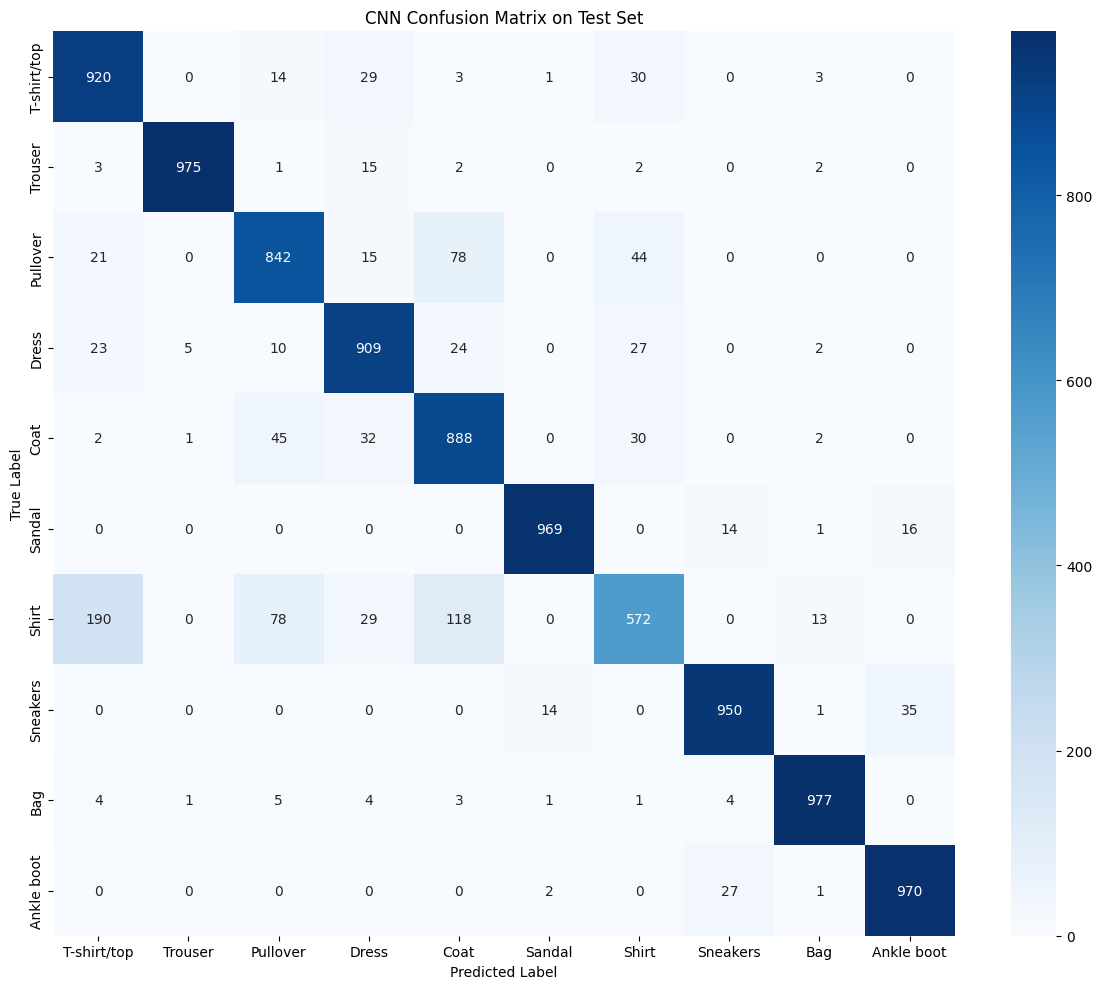


--- Classification Report (Detailed Class Metrics) ---
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.92      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.84      0.84      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.80      0.89      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.81      0.57      0.67      1000
    Sneakers       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [ ]:
#BEST PERFORMING MODEL

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Get predictions (probability distribution)
pred_probs = model.predict(X_test_cnn_data, verbose=0)
# Convert probabilities to single class labels
pred_labels = np.argmax(pred_probs, axis=1)

# 1. Confusion Matrix Calculation
cm = confusion_matrix(y_test_raw, pred_labels)

# 2. Confusion Matrix Plot (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt='d',
    xticklabels=LABELS_MAP,
    yticklabels=LABELS_MAP
)
plt.title("CNN Confusion Matrix on Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show() #

# 3. Classification Report
print("\n--- Classification Report (Detailed Class Metrics) ---")
print(classification_report(y_test_raw, pred_labels, target_names=LABELS_MAP))

The heatmap clearly illustrates the model's strengths and weaknesses:

Easy Classes (High Recall/Diagonal): The deepest blue squares are for classes like Trouser, Bag, Sandal, and Ankle boot. These items are visually distinct from all others, leading to high true positive counts (e.g., almost all 1000 Trousers are correctly classified).

Hard Classes (Off-Diagonal Errors): The model shows significant confusion among the upper-body garments:

Shirt (Row 6): This is the single hardest class by far. The true positive count is the lowest (around $\mathbf{660}$), with significant errors being predicted as T-shirt/top and Coat.

Pullover (Row 2) and Coat (Row 4): These classes often get confused with each other and with the Shirt/T-shirt groups, as they share similar shapes.

The report quantifies this visual analysis:

Shirt: F1-score is approximately $\mathbf{0.70}$, confirming it as the most challenging category.

Trouser/Bag: F1-scores are approximately $\mathbf{0.97}-\mathbf{0.98}$, confirming these as the easiest classes.

We finish off by running zero shot classification


 ZERO-SHOT CLASSIFICATION USING CLIP (No Training Used)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]


ZERO-SHOT CLIP PERFORMANCE (First 500 Test Images)
------------------------------------------------------
  Zero-Shot Accuracy : 63.80%
  Zero-Shot F1 Score : 60.48%

Zero-Shot Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.46      0.84      0.59        55
     Trouser       0.79      0.94      0.86        52
    Pullover       0.67      0.31      0.42        65
       Dress       0.77      0.52      0.62        46
        Coat       0.51      0.67      0.58        57
      Sandal       0.68      0.49      0.57        39
       Shirt       1.00      0.04      0.08        47
    Sneakers       0.66      0.98      0.79        47
         Bag       0.67      0.95      0.79        44
  Ankle boot       0.82      0.69      0.75        48

    accuracy                           0.64       500
   macro avg       0.70      0.64      0.60       500
weighted avg       0.70      0.64      0.60       500



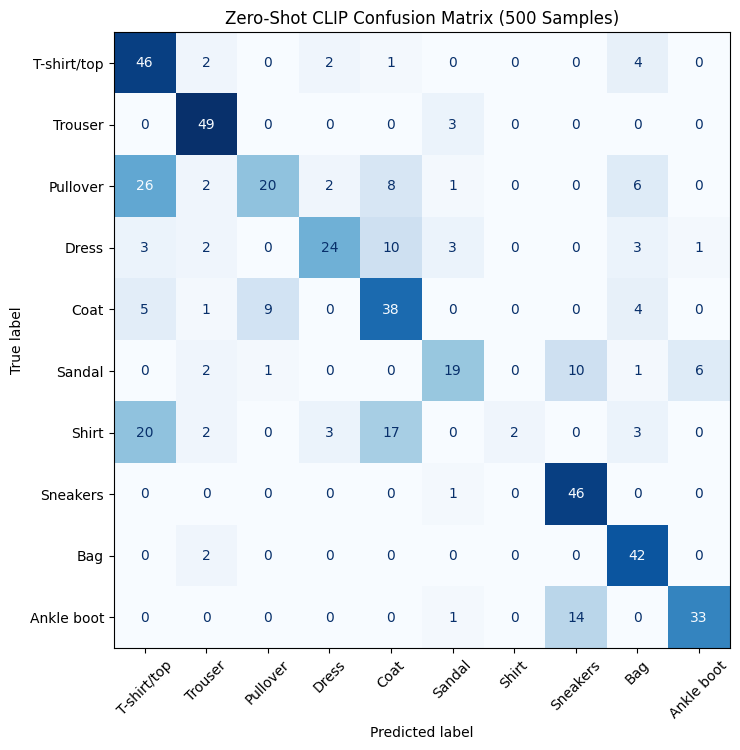

In [ ]:
!pip -q install transformers accelerate pillow

from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

print("\n=======================================================")
print(" ZERO-SHOT CLASSIFICATION USING CLIP (No Training Used)")
print("=======================================================")

# Load pretrained CLIP model
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

class_texts = LABELS_MAP   # 10 Fashion-MNIST class names

def clip_zero_shot_predict(image_array):
    img = Image.fromarray((image_array * 255).astype(np.uint8))
    inputs = clip_processor(text=class_texts, images=img, return_tensors="pt", padding=True)
    outputs = clip_model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1).detach().numpy()[0]
    pred_idx = probs.argmax()
    return pred_idx, probs

# --------------------------------------------------------
# Evaluate CLIP on first 500 test images
# --------------------------------------------------------
sample_n = 500
zs_preds = []

for i in range(sample_n):
    pred_idx, _ = clip_zero_shot_predict(X_test_norm[i])
    zs_preds.append(pred_idx)

zs_preds = np.array(zs_preds)

# Percent-based metrics
zs_acc = accuracy_score(test_labels[:sample_n], zs_preds) * 100
zs_f1  = f1_score(test_labels[:sample_n], zs_preds, average="macro") * 100

print("\nZERO-SHOT CLIP PERFORMANCE (First 500 Test Images)")
print("------------------------------------------------------")
print(f"  Zero-Shot Accuracy : {zs_acc:.2f}%")
print(f"  Zero-Shot F1 Score : {zs_f1:.2f}%")

# --------------------------------------------------------
# Classification Report
# --------------------------------------------------------
print("\nZero-Shot Classification Report:")
print(classification_report(
    test_labels[:sample_n],
    zs_preds,
    target_names=LABELS_MAP
))

# --------------------------------------------------------
# Confusion Matrix
# --------------------------------------------------------
cm = confusion_matrix(test_labels[:sample_n], zs_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=LABELS_MAP)

fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Blues", colorbar=False)
plt.title("Zero-Shot CLIP Confusion Matrix (500 Samples)")
plt.show()


Terrible performance, 0-shot doesn't do well on this data.